# Implement PCA from scratch on the MNIST dataset:

### We can simply put the value of  k -- which gives the information about the number of components/feature-vectors need to select.
### But, here in this code, I am considering that I have to decide the number of features-vectors which will cover atleast 90% variance.

In [1]:
# import some necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
# Load the MNIST dataset
mnist = fetch_openml("mnist_784", data_home='./datasets', cache=True)

/config/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
# Split the data into features (X) and target (y)
X = mnist.data
y = mnist.target

In [5]:
print(f"Shape of X is: {X.shape}")
print(f"Shape of y is: {y.shape}")

Shape of X is: (70000, 784)
Shape of y is: (70000,)


In [6]:
# Center the data by subtracting the mean
X_centered = X - np.mean(X, axis=0)

In [7]:
print(f"Shape of mean of X is: {np.mean(X, axis=0).shape}")

Shape of mean of X is: (784,)


In [8]:
print(f"shape of X and X_centered is: {X.shape} and {X_centered.shape}")

shape of X and X_centered is: (70000, 784) and (70000, 784)


In [9]:
# Calculate the covariance matrix
covariance_matrix = np.cov(X_centered, rowvar=False)

In [10]:
print(f"Shape of covariance matrix is: {covariance_matrix.shape}")

Shape of covariance matrix is: (784, 784)


In [11]:
from sklearn.decomposition import PCA

# Initialize the PCA model with n_components set to 50 (arbitrarily chosen)
pca = PCA(n_components=50)

In [12]:
# Fit the PCA model to the data
pca.fit(X)

PCA(n_components=50)

In [13]:
# Project the data onto the new feature space defined by the PCA components
X_pca = pca.transform(X)

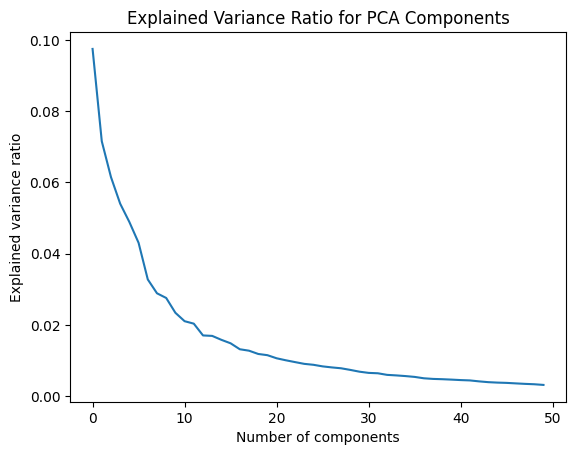

In [14]:
# Plot the explained variance ratio for each PCA component
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("Explained Variance Ratio for PCA Components")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", data_home='./datasets', cache=True)

# Split the data into features (X) and target (y)
X = mnist.data
y = mnist.target

# Center the data by subtracting the mean
X_centered = X - np.mean(X, axis=0)

# Calculate the covariance matrix
covariance_matrix = np.cov(X_centered, rowvar=False)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues in descending order and get the indices of the sorted eigenvalues
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

# Choose k components such that they explain 90% of the variance in the data
total_variance = np.sum(eigen_values)
explained_variance = 0
k = 0
while explained_variance / total_variance < 0.9:
    explained_variance += eigen_values[k]
    k += 1

# Use the first k eigenvectors as the basis for the new feature space
W = eigen_vectors[:,:k]

# Project the centered data onto the new feature space defined by W
X_pca = X_centered.dot(W)

# Plot the explained variance ratio for each PCA component
plt.plot(eigen_values[:k] / total_variance)
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("Explained Variance Ratio for PCA Components")
plt.show()


# Here, at first load the MNIST dataset using fetch_openml and split the data into features (X) and target (y). 
# Next, we center the data by subtracting the mean. We then calculate the covariance matrix, eigenvectors and 
# eigenvalues of the covariance matrix, sort the eigenvalues in descending order, and choose the first k components such that 
# they explain 90% of the variance in the data. The first k eigenvectors are then used as the basis for the new feature space, 
# and the centered data is projected onto this new feature space. Finally, we plot the explained variance ratio for each PCA component.


### NOW, implement PCA from scratch and also download data in simple way:

In [15]:
# oR we can this data from other way also.
# import keras
from keras.datasets import mnist

# Load the MNIST dataset
(X, y), (X_test, y_test) = mnist.load_data()
X = X.reshape(-1, 784)

2023-02-10 00:31:25.684869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 00:31:26.406246: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-10 00:31:26.406289: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-10 00:31:28.276642: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [16]:
X.shape, X_test.shape

((60000, 784), (10000, 28, 28))

In [17]:
# Center the data by subtracting the mean
X_center = X - np.mean(X, axis=0)

<b>numpy.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None, *, dtype=None)</b>
* Estimate a covariance matrix, given data and weights.
* Covariance indicates the level to which two variables vary together.

In [18]:
# Calculate the covariance matrix
covariance_matrix = np.cov(X_center, rowvar=False)

In [19]:
print(f"Shape of X_center is: {X_center.shape}")
print(f"Shape of covariance_matrix is: {covariance_matrix.shape}")

Shape of X_center is: (60000, 784)
Shape of covariance_matrix is: (784, 784)


* <b>np.linalg.eig</b> -- Compute the eigenvalues and right eigenvectors of a square array.

* <b>np.linalg.eigh</b> -- Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix.

* <b>np.linalg.eigvals</b> -- Compute the eigenvalues of a general matrix.

* <b>np.linalg.eigvalsh</b> -- Compute the eigenvalues of a complex Hermitian or real symmetric matrix.

<AxesSubplot: >

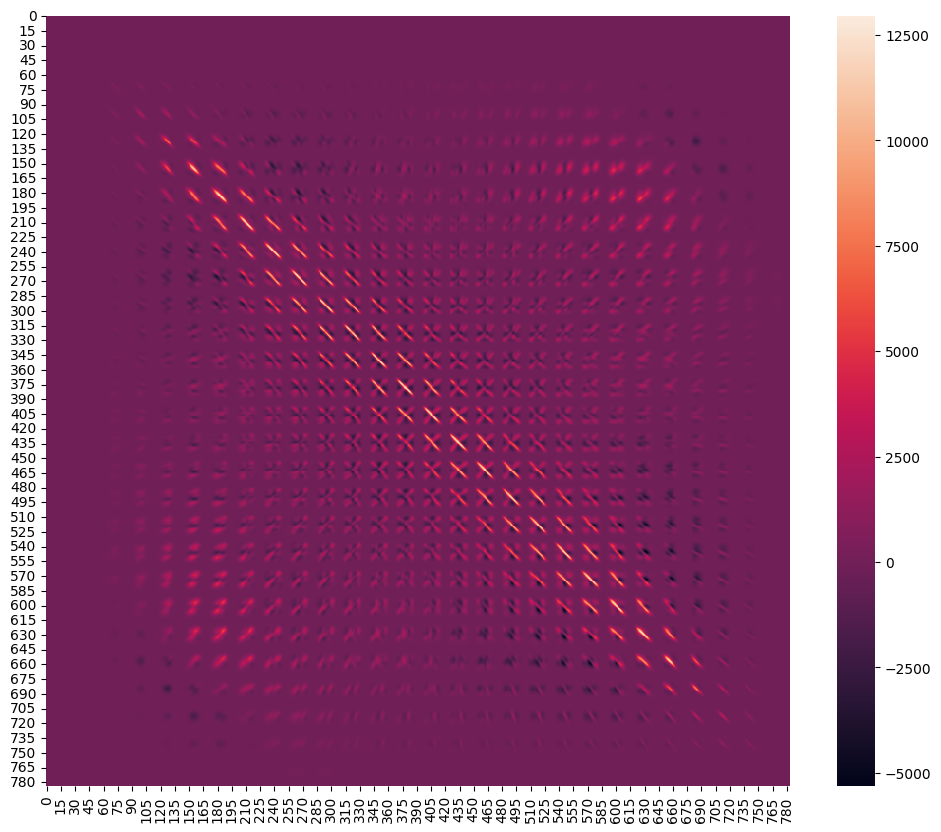

In [20]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(covariance_matrix)

In [21]:
# Calculate the eigenvectors and eigenvalues of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [22]:
print(f"Shape of eigen_values is: {eigen_values.shape}")
print(f"Shape of eigen_vectors is: {eigen_vectors.shape}")

Shape of eigen_values is: (784,)
Shape of eigen_vectors is: (784, 784)


<b>numpy.argsort(a, axis=-1, kind=None, order=None)<b> --> <I>Returns the indices that would sort an array.</I>

In [23]:
# Sort the eigenvalues in descending order and get the indices of the sorted eigenvalues
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]

# also arrange the eigenvectors as according to the eigen values.
eigen_vectors = eigen_vectors[:,idx]

In [24]:
# see few arguments for idx
idx[:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [25]:
print("idx is: \n",idx)

idx is: 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  56  55  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  73  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  97  96  98  99 100 101 102 106 107 105 104 103
 108 109 110 112 111 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 135 134 136 137 138 140 139 141 142 144
 143 145 146 147 148 149 150 151 152 155 154 153 156 157 158 159 161 160
 162 163 165 164 166 168 167 169 170 173 174 172 171 175 176 177 178 179
 180 182 183 181 185 186 187 184 188 192 189 191 193 190 195 198 197 196
 194 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 221 220 222 223 224 228 225 227 226 229 230 231 232 233
 235 234 236 237 238 239 241 240 244 242 

**numpy.cumsum(a, axis=None, dtype=None, out=None)**[source]
* Return the cumulative sum of the elements along a given axis

In [26]:
# Choose k components such that they explain 90% of the variance in the data
total_variance = np.sum(eigen_values)
explained_variance = 0
k = 0
while explained_variance / total_variance < 0.9:
    explained_variance += eigen_values[k]
    k += 1

# we can also use:

# # Compute the cumulative sum of the eigenvalues
# cumulative_sum = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# # Select the number of features such that at least 90% of the variance is covered
# k = np.argmax(cumulative_sum >= 0.9) + 1

In [27]:
print(f"Total variance is: {total_variance}")
print(f"Explained variance is: {explained_variance}")

Total variance is: 3428502.5747802104
Explained variance is: 3086016.501905532


In [28]:
print(f"The value of k is: {k}")

The value of k is: 87


In [29]:
# Use the first k eigenvectors as the basis for the new feature space
W = eigen_vectors[:,:k]

In [30]:
print(f"Shape of eigen vectors after PCA is: {W.shape}")
print(f"Eigen vectors are column-vector")
print(f"Shape of covariance_matrix is: {covariance_matrix.shape}")
print(f"Sahpe of input image (considering all #images) / Shape of X is: {X.shape}")

Shape of eigen vectors after PCA is: (784, 87)
Eigen vectors are column-vector
Shape of covariance_matrix is: (784, 784)
Sahpe of input image (considering all #images) / Shape of X is: (60000, 784)


In [31]:
# Project the centered data onto the new feature space defined by W
X_pca = X_center.dot(W)
print(f"Shape of eigen vectors after PCA is: {W.shape}")
print(f"Shape of X_center after PCA is: {X_center.shape}")
print(f"Shape of X_pca after PCA is: {X_pca.shape}")

Shape of eigen vectors after PCA is: (784, 87)
Shape of X_center after PCA is: (60000, 784)
Shape of X_pca after PCA is: (60000, 87)


### After PCA #features reduces from 784 to 87 which covers 90% variance.

In [32]:
print(f"Total variance is: {total_variance}")
print(f"Explained variance is: {explained_variance}")
print(f"Ratio of explained to taotal variance is: {round(explained_variance/total_variance*100,2)}%")

Total variance is: 3428502.5747802104
Explained variance is: 3086016.501905532
Ratio of explained to taotal variance is: 90.01%


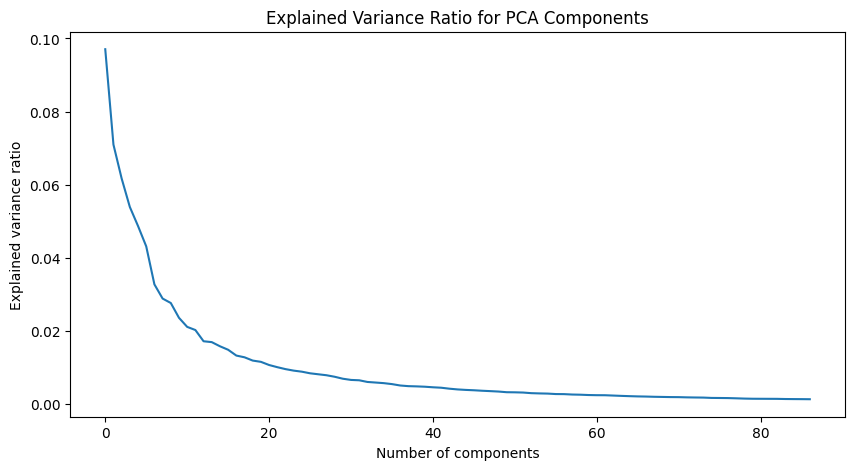

In [33]:
# Plot the explained variance ratio for each PCA component
plt.figure(figsize=(10,5))
plt.plot(eigen_values[:k] / total_variance)
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("Explained Variance Ratio for PCA Components")
plt.show()

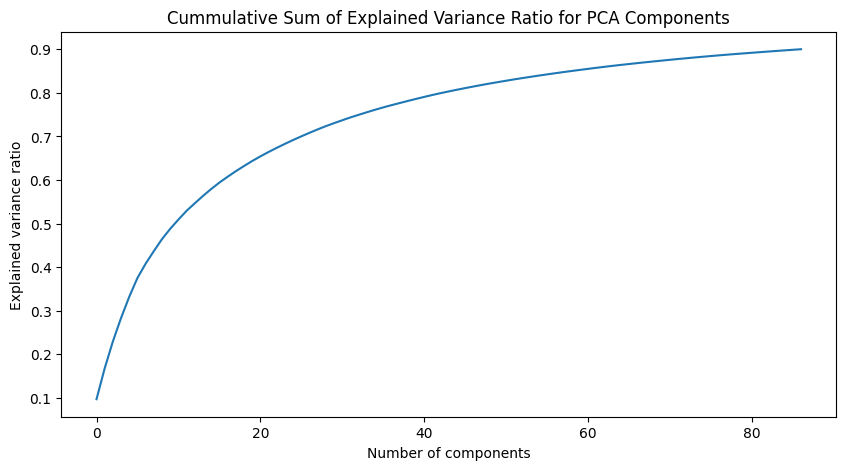

In [35]:
# Plot the explained variance ratio for each PCA component
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(eigen_values[:k]) / np.sum(eigen_values))
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("Cummulative Sum of Explained Variance Ratio for PCA Components")
plt.show()

END